# SHAP API Notebook

This notebook serves as an introductory tutorial demonstrating various functionalities provided by the **SHAP Python library**. SHAP (*SHapley Additive exPlanations*) is widely used for interpreting machine learning models, providing insights into model predictions by computing the contribution of each feature.

## Purpose of this Notebook

- Introduce key SHAP functionalities clearly and concisely.
- Demonstrate practical usage of different SHAP explainers and visualization methods.
- Guide users through step-by-step examples, enhancing understanding of SHAP's API.

## Covered Functionalities

This notebook covers the following key SHAP API functionalities:

- **Explainers**:
  - `TreeExplainer` for tree-based models (XGBoost, LightGBM, etc.)
  - `KernelExplainer` for model-agnostic explanations
  - `DeepExplainer` for deep learning models
  
- **Visualizations**:
  - SHAP Summary Plot
  - SHAP Dependence Plot
  - SHAP Force Plot (single and multiple instances)
  - SHAP Decision Plot

- **Advanced SHAP Features**:
  - Computing SHAP Interaction Values
  - Explaining text and image model predictions

## Complementary Documentation

This notebook directly complements the documentation provided in [`SHAP.API.md`](SHAP.API.md), which details:

- The theoretical background of each SHAP explainer type
- Usage scenarios and best practices for each SHAP visualization
- Input/output details and interpretations for various SHAP methods

## Scope Clarification

Unlike the comprehensive SHAP pipeline demonstration (`SHAP.example.ipynb`), this notebook focuses specifically on illustrating individual SHAP API methods and their respective functionalities, making it an ideal resource for users new to SHAP.


In [16]:
# %load_ext autoreload
# %autoreload 2
# %matplotlib inline

# %reload_ext autoreload
# %autoreload 2

## Import libraries and Packages

In [17]:
# Add src/ to path

import sys
sys.path.append("src")

In [18]:
import os
import shap
import numpy as np
import pandas as pd
import xgboost
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

## 1. Dataset Setup and Basic Model Training

First, let's prepare a simple model and data that we'll use throughout the notebook.

### 1.1 Load the Breast Cancer Dataset (Example data)

In [19]:
# Load and prepare dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1.2 Split the dataset and then train a model on it (here we are using XGBoost for example)

In [20]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train an XGBoost model
model = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## 2. SHAP TreeExplainer

`TreeExplainer` is a SHAP method optimized for tree-based models like XGBoost, LightGBM, and Random Forest. It computes SHAP values efficiently by leveraging the structure of decision trees.

We use it here to explain how each feature contributes to individual model predictions. The output (`shap_values`) contains per-feature contribution scores for each test sample.

In [21]:
# Create SHAP TreeExplainer for the trained model
explainer = shap.TreeExplainer(model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Display shape and a sample row of SHAP values
print("SHAP values shape:", np.array(shap_values).shape)
print("\nSample SHAP values for the first test instance:\n")
shap_df = pd.DataFrame(shap_values[0], index=X_test.columns, columns=["SHAP Value"])
print(shap_df.sort_values(by="SHAP Value", ascending=False).head(10))

SHAP values shape: (143, 30)

Sample SHAP values for the first test instance:

                      SHAP Value
mean concave points     1.235452
worst concave points    1.136247
worst area              1.131517
compactness error       0.718411
worst texture           0.640977
mean texture            0.574832
area error              0.431621
worst perimeter         0.251493
worst radius            0.242837
mean compactness        0.221086


### Interpretation

The SHAP values have shape `(143, 30)`, meaning we have 143 test instances and 30 features.

For the first test instance, the top contributing features are:

- `mean concave points`, `worst concave points`, and `worst area`, each with high positive SHAP values.
- These features pushed the model's prediction **strongly toward the positive class** (i.e., higher likelihood of the target being 1).

Higher SHAP values indicate greater influence on increasing the prediction output for this instance.


## 3. Summary Plot – Global Feature Importance

The summary plot provides a global view of feature importance by aggregating SHAP values across all test instances.

Each dot represents a SHAP value for a feature and a sample. Features are ranked by overall impact, and color shows whether the feature value was high or low for that point.


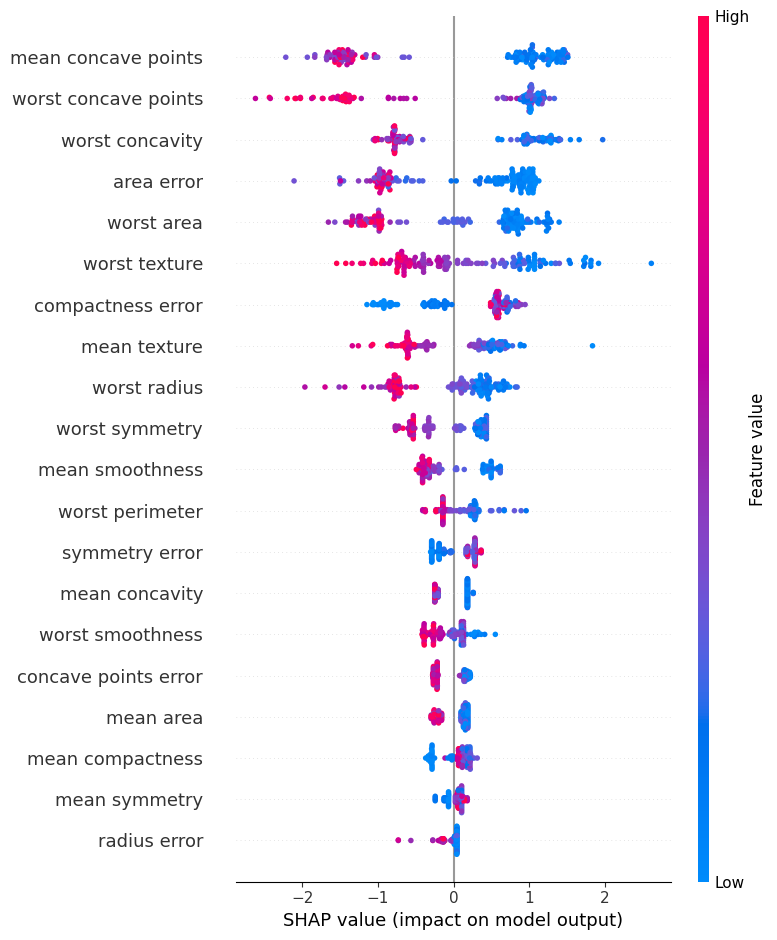

In [22]:
shap.summary_plot(shap_values, X_test)

## 4. Dependence Plot – Feature Interaction Effects

The dependence plot shows how a single feature’s value affects its SHAP value across all instances, and optionally reveals interaction with another feature via color.

This helps detect non-linear relationships or interactions between features.

This plot will show:

- The x-axis: actual feature value

- The y-axis: SHAP value (impact on prediction)

- Color: interaction effect with another automatically chosen feature



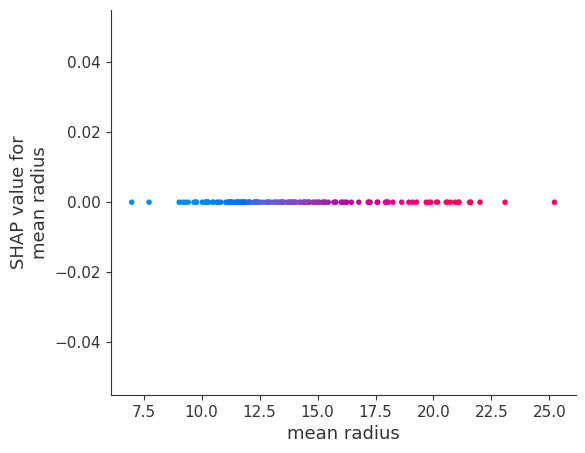

In [23]:
# Shows how 'mean radius' values relate to their SHAP values
shap.dependence_plot("mean radius", shap_values, X_test)

## 5. Force Plot – Local Explanation for a Single Prediction

The force plot breaks down a single prediction to show how each feature contributed to pushing the model output above or below the base value (expected prediction).

Red features push the prediction higher, blue features push it lower.

In [24]:
# Force plot for the first test sample
shap.initjs()  # Needed for rendering the interactive JS plot
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

### Interpretation – Force Plot for One Prediction

The force plot above explains a **single prediction** made by the model.

- **Base value** (expected output with no features): ~0.68  
- **Final model output**: **6.10**  
- Features in **red** pushed the prediction higher (toward class 1).  
- Features in **blue** pulled the prediction lower (toward class 0).

**Key contributors**:
- Strong positive impact: `mean texture`, `worst texture`, `worst area`, `worst concave points`
- Mild negative impact: `worst concavity`, `worst smoothness`

These SHAP values show how the individual feature values explain the model’s final decision.


## 6. Force Plot – Multiple Predictions

This force plot stacks multiple individual explanations, allowing you to see how the model behaves across different instances.

Each row represents one prediction. Red features push the output higher, blue push it lower.


In [25]:
# Force Plot for Multiple Instances (first 100 rows)

# Initialize JS support
shap.initjs()

# Display force plot for multiple instances
shap.force_plot(
    explainer.expected_value,
    shap_values[:100],
    X_test.iloc[:100]
)

### Interpretation – Force Plot for Multiple Predictions

This plot shows SHAP explanations for the first 100 predictions.

- **Each row** represents one individual prediction.
- **Red segments** indicate features pushing the prediction higher (toward class 1).
- **Blue segments** show features pulling the prediction lower (toward class 0).
- The **thickness** of the segments shows the strength of the contribution.

From the plot:
- Most predictions are influenced by features like `worst concavity`, `worst area`, and `mean texture`.
- Around the 60th sample (highlighted), the prediction is strongly increased by red features, especially `worst area` and `worst concavity`.

This visualization helps identify global patterns and feature consistency across predictions.


## 7. Decision Plot – Cumulative Feature Effects

The decision plot visualizes how the model builds up a prediction by adding feature contributions step by step.

- Each line represents one instance.
- The x-axis shows the order of features added.
- The y-axis shows the cumulative model output at each step.

This helps trace how individual features contribute to the final prediction.

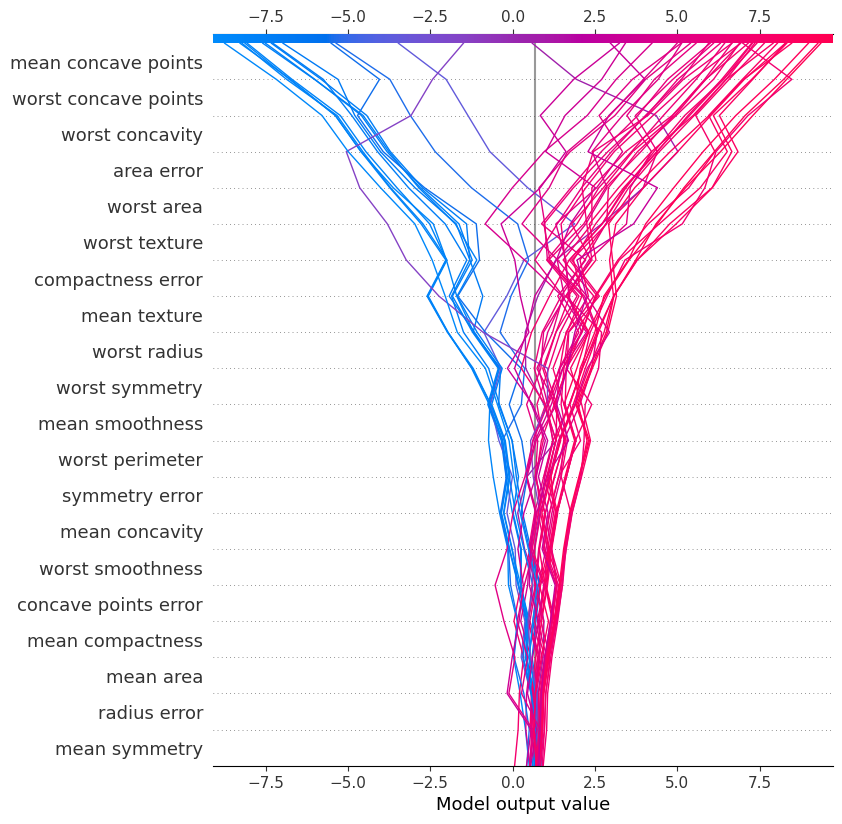

In [26]:
# Show SHAP decision plot for the first 50 test samples
shap.decision_plot(
    explainer.expected_value,
    shap_values[:50],
    X_test.iloc[:50]
)

### Interpretation – SHAP Decision Plot

This decision plot shows how the model's prediction builds up as it considers each feature.

- **Each line** represents a single prediction.
- The x-axis is the cumulative model output value as features are added.
- The y-axis lists features in the order they were used to explain the prediction path.
- **Red lines** correspond to higher final predictions (likely class 1), and **blue lines** to lower ones (likely class 0).

From the plot:
- Features like `mean concave points`, `worst concave points`, and `worst concavity` are consistently impactful.
- The divergence in lines near the top indicates strong feature influence early in the decision path.

This plot is useful to trace how predictions differ between positive and negative classes.

## 8. KernelExplainer – For Any Model

`KernelExplainer` works with any model by treating it as a black box. It approximates SHAP values using LIME-like local perturbations.

It is slower than `TreeExplainer`, so we typically use a small background sample and explain a few test instances.


  0%|          | 0/5 [00:00<?, ?it/s]

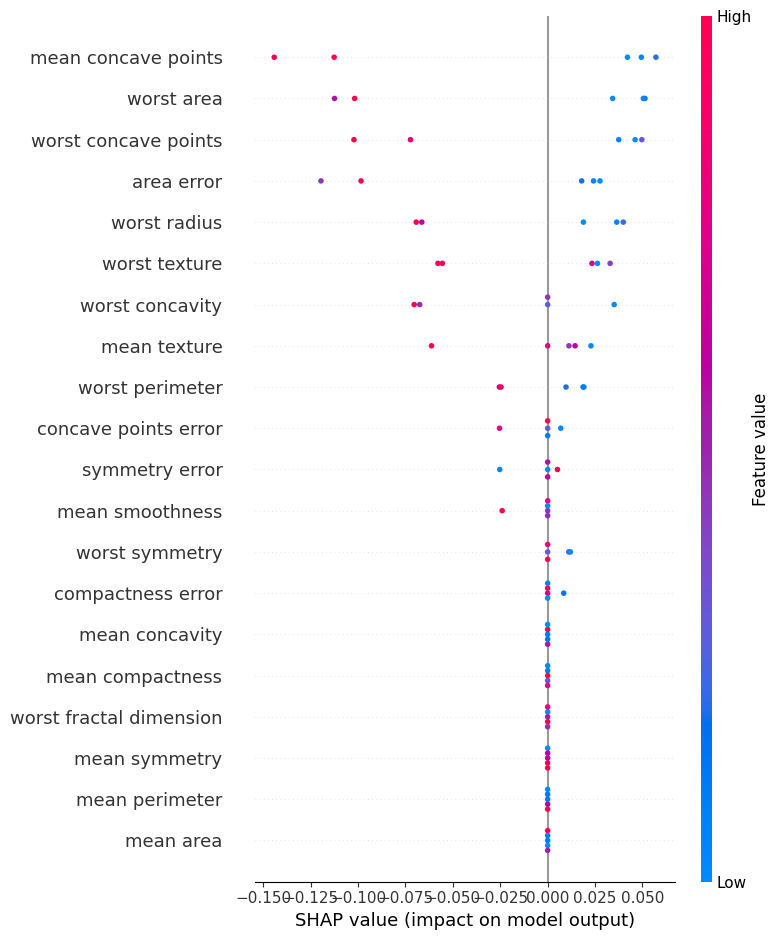

In [27]:
# Define a prediction function for KernelExplainer
def predict_fn(X):
    return model.predict_proba(X)[:, 1]

# Use a small background sample for efficiency
background = X_train.sample(n=50, random_state=42)

# Initialize KernelExplainer
kernel_explainer = shap.KernelExplainer(predict_fn, background)

# Explain a small number of test instances
kernel_shap_values = kernel_explainer.shap_values(X_test.iloc[:5], nsamples="auto")

# Visualize the SHAP values
shap.summary_plot(kernel_shap_values, X_test.iloc[:5])

### Interpretation – KernelExplainer Summary Plot

This summary plot shows SHAP values computed using `KernelExplainer` for a small sample of test instances.

- **Each dot** represents a SHAP value for a feature in one prediction.
- **X-axis**: SHAP value (impact on the model output).
- **Y-axis**: Features, ranked by average importance across samples.
- **Color**: Actual feature value (red = high, blue = low).

From the plot:
- Features like `mean concave points`, `worst area`, and `worst concave points` have the most consistent impact.
- Most feature contributions are small (clustered near 0), reflecting the small number of samples and KernelExplainer’s approximate nature.

This is useful for interpreting models when `TreeExplainer` cannot be used.


## 9. SHAP Interaction Values – Feature Pair Effects

While standard SHAP values show how much each feature contributes individually, interaction values break that down further into:

- Main effects (feature's solo contribution)
- Pairwise interaction effects (combined influence of feature pairs)

This helps uncover interactions that affect predictions beyond simple additive contributions.


<Figure size 640x480 with 0 Axes>

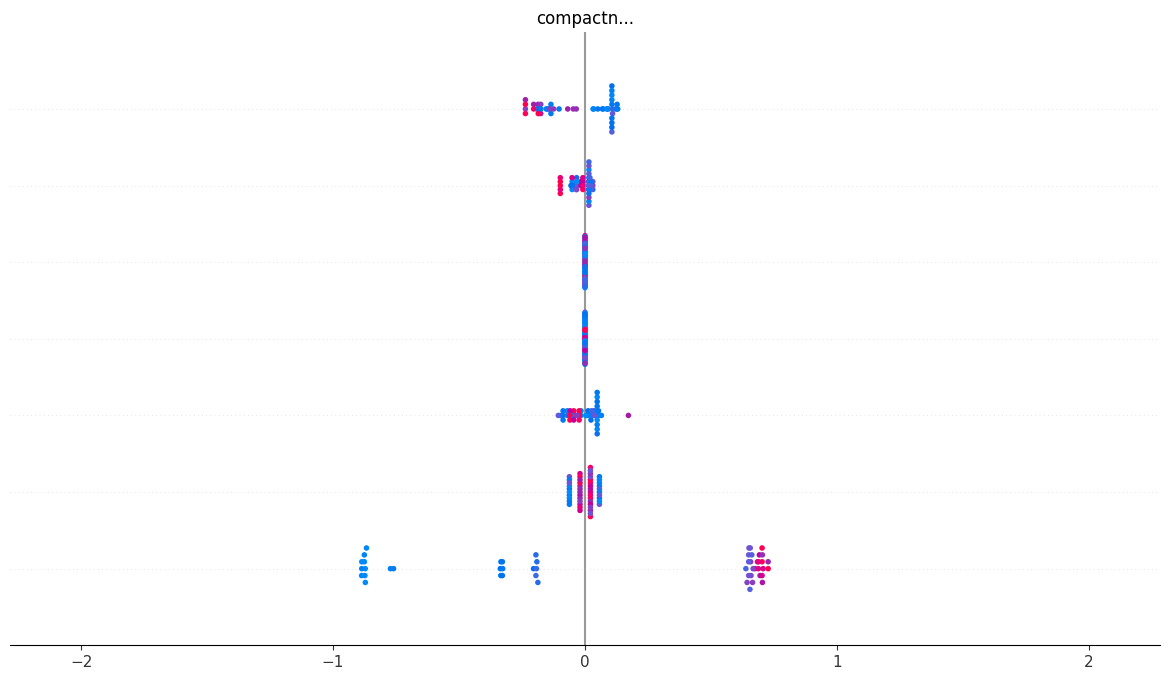

In [28]:
# Compute SHAP interaction values (slow, so use a subset)
interaction_values = explainer.shap_interaction_values(X_test.iloc[:50])

# Visualize the main diagonal (individual effects only)
shap.summary_plot(interaction_values, X_test.iloc[:50])

###  Interpretation – SHAP Interaction Summary Plot

This plot visualizes the SHAP interaction values for a single feature (`compactness error`) across multiple predictions.

- **X-axis**: Combined SHAP interaction value (including main effect + interaction effects).
- **Dots**: Individual data points from the test set.
- **Color**: Actual feature value (red = high, blue = low).

From the plot:
- Most SHAP interaction values for `compactness error` are centered around zero, suggesting it has minimal standalone or pairwise interaction impact on predictions.
- A few instances with extreme values show slight interaction effects, but overall, this feature appears to have low predictive contribution compared to others.

This kind of plot is useful for detecting subtle nonlinear interactions.


## 10. DeepExplainer – For Deep Learning Models

`DeepExplainer` is optimized for deep neural networks. It computes SHAP values for TensorFlow or Keras models by leveraging internal gradients and model structure.

This is especially useful for vision or NLP tasks, where traditional explainers are too slow or inaccurate.


235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7948 - loss: 0.7707


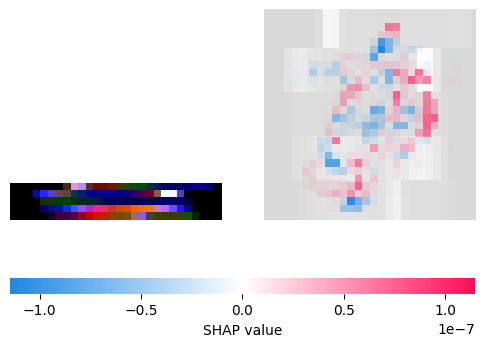

In [29]:
# Load MNIST digit data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Define a simple feedforward neural network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=1, batch_size=256)

# Use a small background set for DeepExplainer
background = x_train[:100]
test_images = x_test[:5]

# Create the SHAP DeepExplainer
explainer = shap.DeepExplainer(model, background)

# Compute SHAP values for test samples
shap_values = explainer.shap_values(test_images)

# Visualize SHAP values for class 0
shap.image_plot(shap_values[0], test_images)


### Interpretation – SHAP Image Plot (DeepExplainer on MNIST)

This plot shows SHAP explanations for a deep learning model's prediction on an MNIST digit image (likely the digit **3**).

- The **grayscale image** in the background is the original input image.
- **Red regions** indicate pixels that pushed the prediction **higher** for the target class (positive SHAP contribution).
- **Blue regions** indicate pixels that pulled the prediction **lower** (negative SHAP contribution).
- The **color bar** at the bottom shows SHAP value intensity.

From the plot:
- Key strokes of the digit “3” have strong positive (red) contributions.
- Blue regions, especially in curved areas, suggest the model considered those pixels as reducing its confidence in the prediction.

This visualization helps understand which parts of the input the model focuses on when making a decision.


## 📘 Summary – SHAP API Tutorial Notebook

This notebook provided a hands-on walkthrough of the SHAP (SHapley Additive exPlanations) Python library, demonstrating its key functionalities for interpreting machine learning models.

We covered:

1. **TreeExplainer** – Fast, exact SHAP values for tree-based models (e.g., XGBoost).
2. **Summary Plot** – Visual ranking of features by impact across all predictions.
3. **Dependence Plot** – Relationship between a feature’s value and its SHAP value.
4. **Force Plot (Single & Multi-instance)** – Detailed local explanations showing how features push predictions up or down.
5. **Decision Plot** – Cumulative contribution of features to model output.
6. **KernelExplainer** – Model-agnostic SHAP explainer for any black-box model.
7. **Interaction Values** – Analysis of pairwise feature interactions.
8. **DeepExplainer** – SHAP explanations for deep learning models on image data.

Each step included a clear example and visualization to help understand how SHAP attributes predictions to input features — both globally and locally.

This notebook serves as a foundational reference for anyone looking to integrate SHAP into their model interpretation workflow.
